In [1]:
%run "../src/read_data.py"

Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133
Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133
Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133
Yay for FT106
Yay for FT112
Yay for FT118
Yay for FT120
Yay for FT126
Yay for FT136
Yay for FT127
Yay for FT133


In [5]:
df_to_use = df_area_norm

def subset_to_array(df, selector_dict):

    df_subset = df
    for key, val in selector_dict.items():
        if key not in df_subset.columns:
            print(key, "is not in the list of columns. Check selector!")
            return

        df_subset = df_subset[df_subset[key] == val]
    
    df_array = df_subset.to_numpy()[:,5:]

    return df_array

nr_water_selector = {"celltype": "fos", "diet": "nr", "solution2": "water"}
nr_cas_selector = {"celltype": "fos", "diet": "nr", "solution2": "casein"}
pr_water_selector = {"celltype": "fos", "diet": "pr", "solution2": "water"}
pr_cas_selector = {"celltype": "fos", "diet": "pr", "solution2": "casein"}

nr_water = subset_to_array(df_to_use, nr_water_selector)
nr_cas = subset_to_array(df_to_use, nr_cas_selector)
pr_water = subset_to_array(df_to_use, pr_water_selector)
pr_cas = subset_to_array(df_to_use, pr_cas_selector)

df_array = np.concatenate([nr_water, nr_cas, pr_water, pr_cas])

In [4]:
def find_biggest_diffs(df):

    df_diff = pd.DataFrame(columns=["Difference score"])
    for column in df.columns:
        if is_numeric_dtype(df[column]):
            data_water = df[df["solution2"] == "water"][column]
            data_cas = df[df["solution2"] == "casein"][column]

            df_new = pd.DataFrame(data=[data_cas.mean() - data_water.mean()], columns=["Difference score"], index=[column])
            df_diff = pd.concat([df_diff, df_new])

    return df_diff

df_diff = find_biggest_diffs(df_area_norm)

len(df_diff)
sort_inds = np.argsort(df_diff["Difference score"])
sort_inds

Clear Label                    305
root                            82
Frontal pole, layer 6a          84
Frontal pole, layer 6b         306
Primary motor area, Layer 1    262
                              ... 
choroid plexus                 165
third ventricle                332
cerebral aqueduct              504
fourth ventricle               284
lateral recess                 273
Name: Difference score, Length: 575, dtype: int64

In [67]:
df_cells_fos = df_cells_norm[df_cells_norm["celltype"] == "fos"]
df_sorted = df_cells_fos.sort_values(['diet', 'solution2'],
              ascending = [True, False])

cells_array = df_sorted.to_numpy()[:,5:]
cells_array_float = np.array(cells_array, dtype="float32")

In [6]:
df_area_fos = df_area_norm[df_area_norm["celltype"] == "fos"]
df_sorted = df_area_fos.sort_values(['diet', 'solution2'],
              ascending = [True, False])

area_array = df_sorted.to_numpy()[:,5:]
area_array_float = np.array(area_array, dtype="float32")

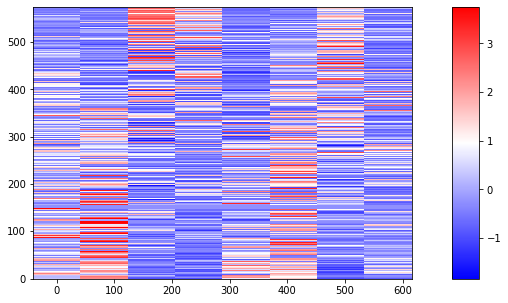

In [9]:
import trompy as tp
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5), ncols=2, gridspec_kw={"width_ratios": [14,1]})

data = area_array_float.T
data = data[sort_inds]

# clims = [-0.14, 1.2]
(ntrials, bins) = np.shape(data)

xvals = np.linspace(0, 575,bins)
yvals = np.arange(0, ntrials)
(xx, yy) = np.meshgrid(xvals, yvals)

mesh = ax[0].pcolormesh(xx, yy, data, cmap="bwr", shading="auto")
cbar = f.colorbar(mesh, cax=ax[1], ticks=[-2, -1, 0, 1, 2, 3])
# mesh.set_clim(clims)


In [62]:
len(yy)

575

In [82]:
len(df_diff)
sort_inds = np.argsort(df_diff["Difference score"])
sort_inds

Clear Label                    305
root                            82
Frontal pole, layer 6a          84
Frontal pole, layer 6b         306
Primary motor area, Layer 1    262
                              ... 
choroid plexus                 165
third ventricle                332
cerebral aqueduct              504
fourth ventricle               284
lateral recess                 273
Name: Difference score, Length: 575, dtype: int64

In [41]:
X = area_array_float
X.shape

from sklearn.decomposition import PCA

pca_all = PCA(random_state=2020)
pca_all.fit(X)
X_pca_all = pca_all.transform(X)

In [42]:
np.shape(X_pca_all)
print(sum(pca_all.explained_variance_ratio_ * 100))

100.00000190734902


(0.0, 1.1)

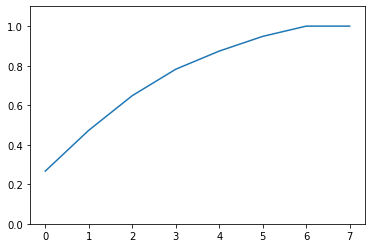

In [43]:
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.ylim([0,1.1])

In [44]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)

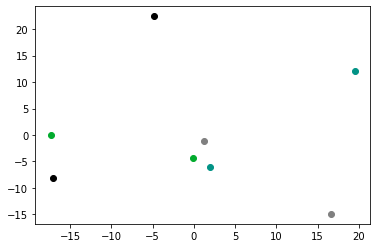

In [51]:
f, ax = plt.subplots()

ax.scatter(X_pca_2[0:2,0], X_pca_2[0:2,1], color="grey", marker="o")
ax.scatter(X_pca_2[2:4,0], X_pca_2[2:4,1], color="black", marker="o")
ax.scatter(X_pca_2[4:6,0], X_pca_2[4:6,1], color="xkcd:teal", marker="o")
ax.scatter(X_pca_2[6:,0], X_pca_2[6:,1], color="xkcd:kelly green", marker="o")